In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [181]:
data = pd.read_csv("data_raw_renumbered.csv", sep=",")
data_readable = pd.read_csv("data_readable.csv", sep=",")

## Viewing Dataset

In [182]:
data

,student_id,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listening,discussion_improves_interest,flip_classroom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,2,2,3,3,1,-1,-1,1,1,...,1.0,1,3,2,1,-1.0,1,1,1,1
1,STUDENT2,2,2,3,3,1,-1,-1,1,1,...,1.0,1,3,2,3,-1.0,2,3,1,1
2,STUDENT3,2,2,2,3,-1,-1,-1,2,4,...,1.0,1,2,2,1,1.0,2,2,1,1
3,STUDENT4,1,1,1,3,1,-1,1,2,1,...,1.0,2,3,2,2,1.0,3,2,1,1
4,STUDENT5,2,2,1,3,-1,-1,1,3,1,...,2.0,1,2,2,2,1.0,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,-1,1,1,...,1.0,1,2,1,2,1.0,3,3,9,5
141,STUDENT142,1,1,2,4,-1,-1,-1,1,4,...,1.0,1,3,2,2,1.0,5,3,9,5
142,STUDENT143,1,1,1,4,-1,-1,-1,1,1,...,1.0,1,3,3,2,1.0,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2.0,1,2,1,2,1.0,5,3,9,4


In [23]:
data_readable

,student_id,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listening,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,22-25,male,other,50%,Yes,No,No,135-200,Bus,...,Alone,Close to Exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,male,other,50%,Yes,No,No,135-200,Bus,...,Alone,Close to Exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,male,state,50%,No,No,No,201-270,Other,...,Alone,Close to Exam,Sometimes,Sometimes,Never,Not Useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,female,private,50%,Yes,No,Yes,201-270,Bus,...,Alone,Regularly during Semester,Always,Sometimes,Sometimes,Not Useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,male,private,50%,No,No,Yes,271-340,Bus,...,With Friends,Close to Exam,Sometimes,Sometimes,Sometimes,Not Useful,2.00-2.49,2.00-2.49,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,22-25,female,state,50%,Yes,Yes,No,135-200,Bus,...,Alone,Close to Exam,Sometimes,Never,Sometimes,Not Useful,2.50-2.99,2.50-2.99,9,BB
141,STUDENT142,18-21,female,state,75%,No,No,No,135-200,Other,...,Alone,Close to Exam,Always,Sometimes,Sometimes,Not Useful,Above 3.49,2.50-2.99,9,BB
142,STUDENT143,18-21,female,private,75%,No,No,No,135-200,Bus,...,Alone,Close to Exam,Always,Always,Sometimes,Not Useful,3.00-3.49,2.50-2.99,9,DD
143,STUDENT144,22-25,female,state,75%,Yes,Yes,Yes,Above 410,Private car/taxi,...,With Friends,Close to Exam,Sometimes,Never,Sometimes,Not Useful,Above 3.49,2.50-2.99,9,CB


## Visualizing Features to Grade

### Weekly Study Hours to GPA by Course

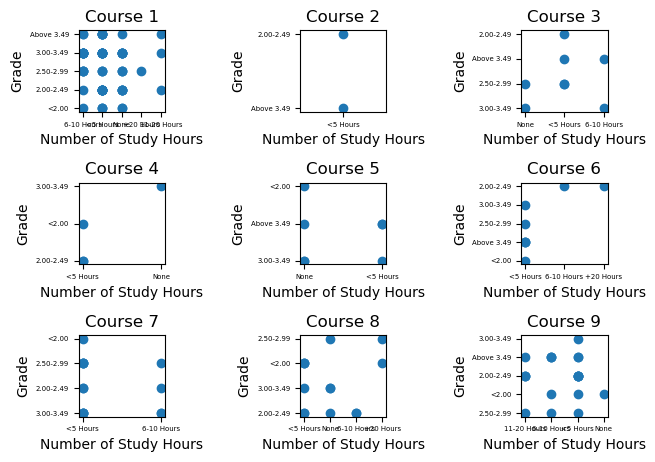

In [45]:
grades = []
study_hours = []
plot_num = 1
prev_course = 1
for index, row in data_readable.iterrows():
    ax = plt.subplot(3, 3, plot_num)
    g = row['grade_previous']
    s = row['weekly_study_hours']
    course = row['course_id']
    if course != prev_course:
        ax.scatter(study_hours, grades)
        ax.set_xlabel('Number of Study Hours')
        ax.set_ylabel('Grade')
        ax.set_title('Course ' + str(prev_course))
        plt.tick_params(axis='both', which='major', labelsize=5)
        plot_num +=1
        grades.clear()
        study_hours.clear()
    prev_course = row['course_id']
    grades.append(g)
    study_hours.append(s)
ax.scatter(study_hours, grades)
ax.set_xlabel('Number of Study Hours')
ax.set_ylabel('Grade')
ax.set_title('Course ' + str(prev_course))
plot_num +=1
grades.clear()
study_hours.clear()
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=5)

## Running Linear Regression on DataSet

### data preparation 

In [179]:
# Creating X matrix
X = data.drop(columns=['grade_expected', 'grade', 'student_id', 'grade_previous'])
X_labels = X
# Creating y matrix
y = data['grade_expected']
y = np.array(y)
# Turning x into array
X = X.to_numpy()
# Transpose X and y
X = X.T
y = y.T
print(X.shape)
print(y.shape)

(29, 145)
(145,)


### finding the best predictor

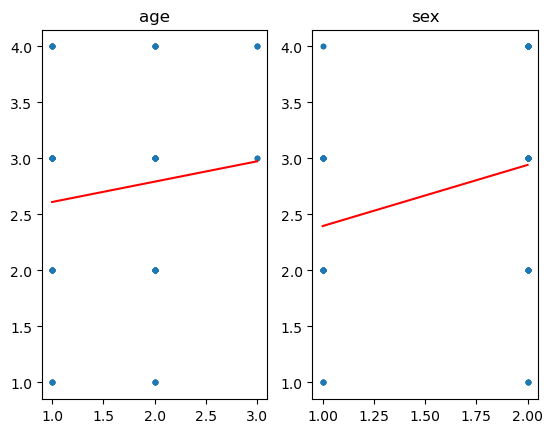

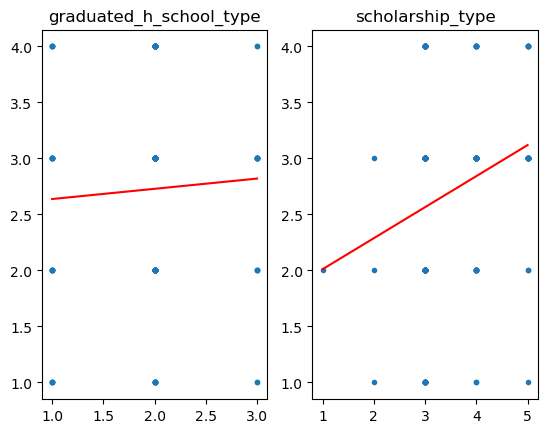

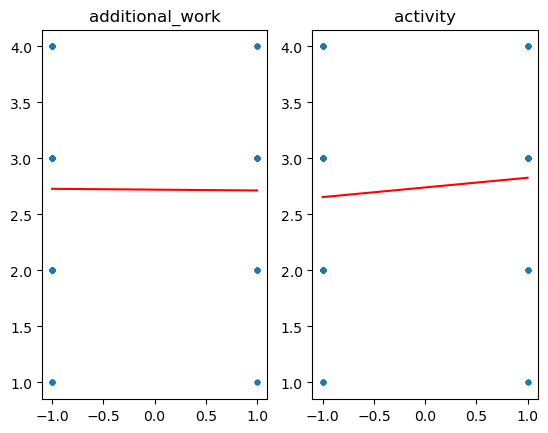

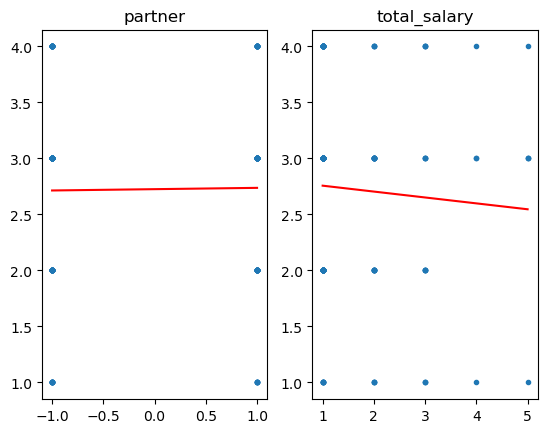

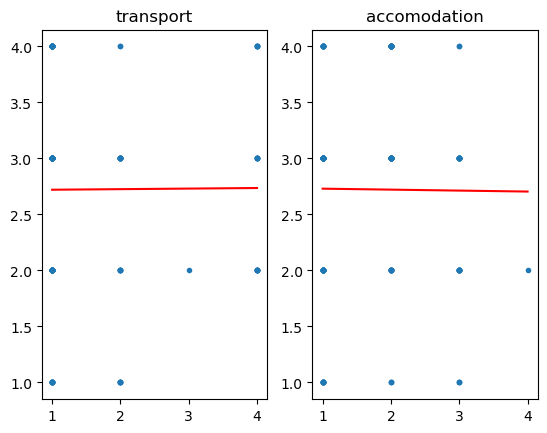

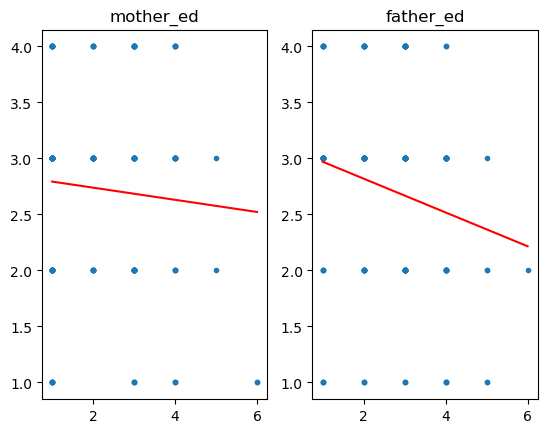

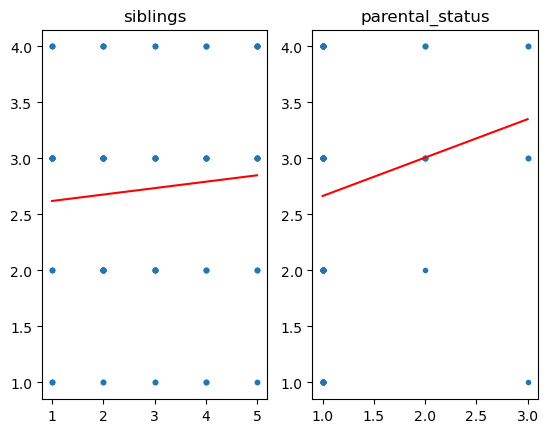

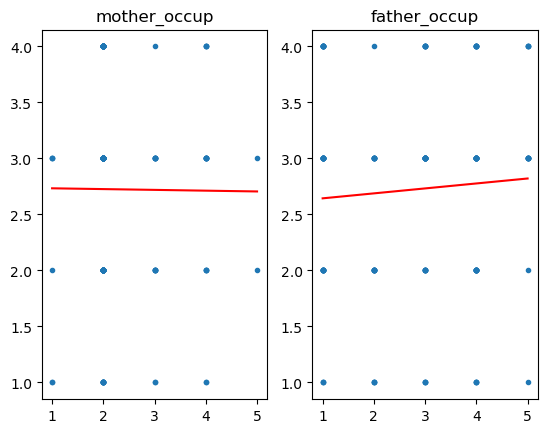

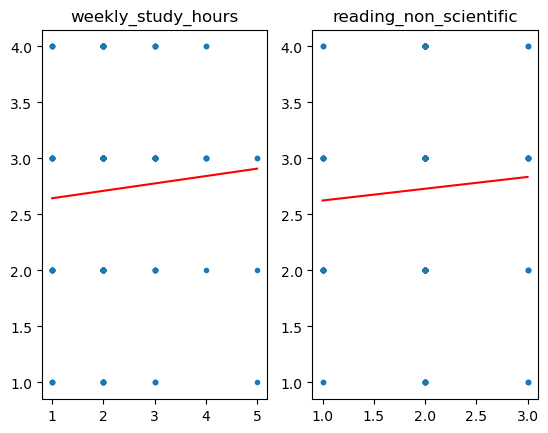

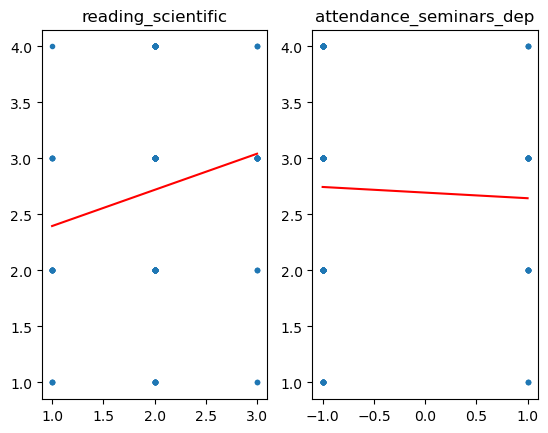

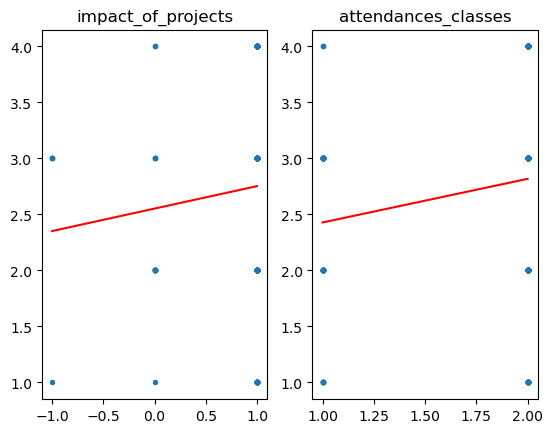

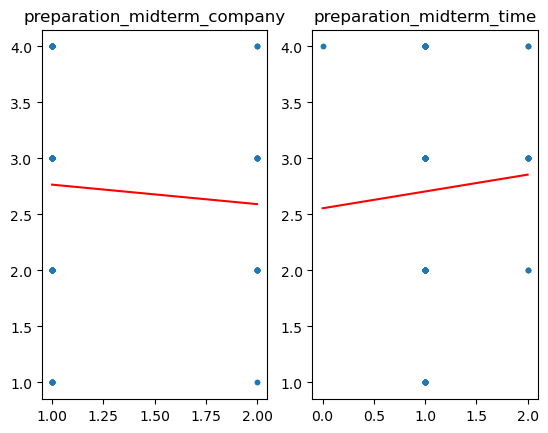

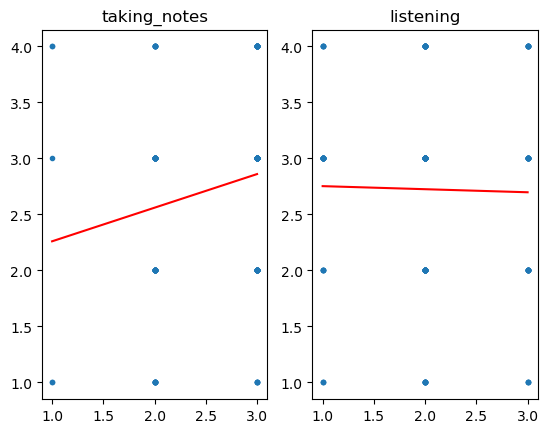

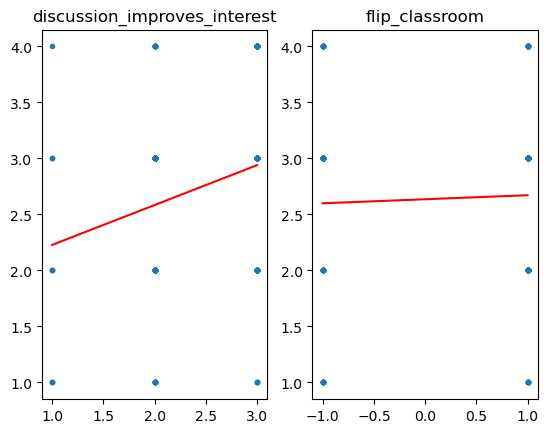

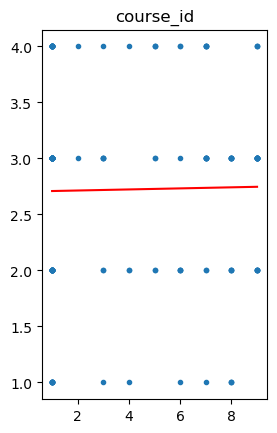

In [165]:
mse_nums = []
for i in range(len(X)):
    plt.subplot(1,2,2-(i+1)%2)
    temp = X[i]
    removed_rows = ~np.isnan(temp)
    temp = temp[removed_rows]
    y_temp = y[removed_rows]
    X_ = np.vstack([temp, np.ones(len(temp))]).T
    w1, w0 = np.linalg.lstsq(X_, y_temp, rcond=None)[0]
    t = np.linspace(np.min(temp),np.max(temp),20)
    plt.plot(X[i],y,'.')
    y_hat = w1*temp + w0
    mse_nums.append(mse(y_hat, y_temp))
    plt.plot(t, w1*t + w0, 'r')
    plt.title(X_labels.columns[i])
    if ((i+1)%2==0):
        plt.show()

### finding min squared errors

In [126]:
def mse(y_hat, y):
    return (1/float(len(y_hat))) * np.sum((y_hat-y)**2)

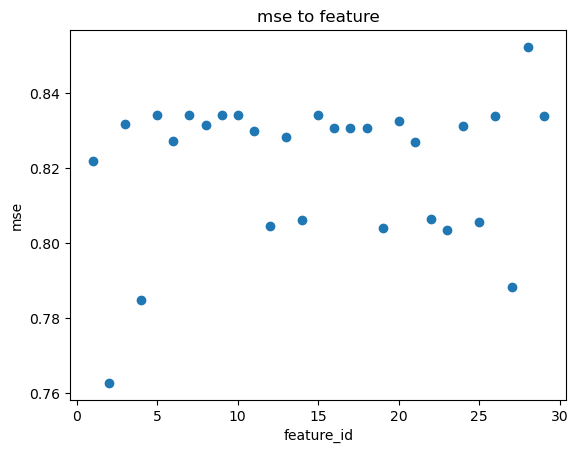

In [166]:
x_range = [i for i in range(1, len(mse_nums)+1)]
plt.scatter(x_range, mse_nums)
plt.title("mse to feature")
plt.ylabel("mse")
plt.xlabel("feature_id")
min_error = np.min(mse_nums)
min_feature = mse_nums.index(min_error)

### most accurate predictor

In [168]:
print(X_labels.columns[min_feature])

sex


### the best linear predictor using all 30 features

In [ ]:
old_data = pd.read_csv("data_raw.csv", sep=";")
# Creating X matrix
X = old_data.drop(columns=['grade_expected', 'grade', 'student_id', 'grade_previous'])
X_labels = X
# Creating y matrix
y = data['grade_expected']
y = np.array(y)
# Turning x into array
X = X.to_numpy()
# Transpose X and y
X = X.T
y = y.T
print(X.shape)
print(y.shape)

(145, 30)
(30,)


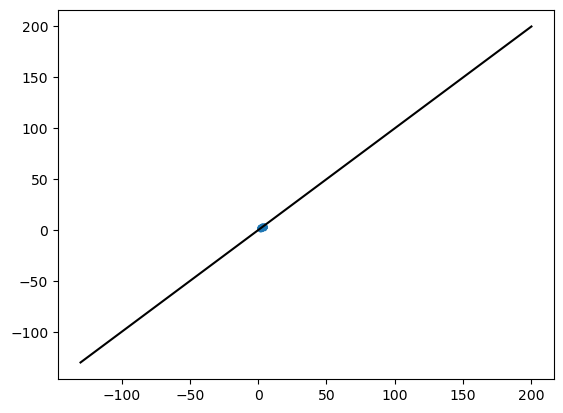

In [180]:
A = np.vstack([X, np.ones(len(X[i]))]).T
print(A.shape)
w=np.zeros(len(X)+1)
print(w.shape)
w = np.linalg.lstsq(A, y, rcond=None)[0]
Y_=np.matmul(A,w)
plt.plot(y,Y_,'.')
plt.plot([-130, 200],[-130, 200],'k-')
plt.show()

In [183]:
all_features_mse = mse(Y_,y)
print("MSE with all 30 features: " + str(all_features_mse))
print("MSE from most correlated feature: " +str(min_error))

MSE with all 30 features: 0.49132096295753586
MSE from most correlated feature: 0.7627031311930241


Running linear regression with all 30 features gives us a more accurate GPA prediction than looking at individual features one by one. 